# TITANIC DATASET ANALYSIS

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns # statistical plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
df.apply(lambda x : sum(x.isnull()), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(len(df.index))

891


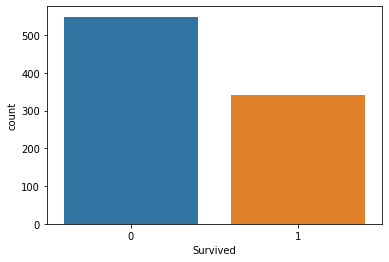

In [6]:
# analyzing data
sns.countplot(x="Survived", data=df)

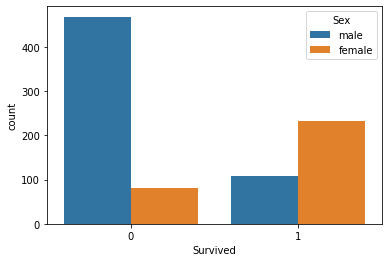

In [7]:
# gender survival rate
sns.countplot(x="Survived", hue="Sex", data = df)

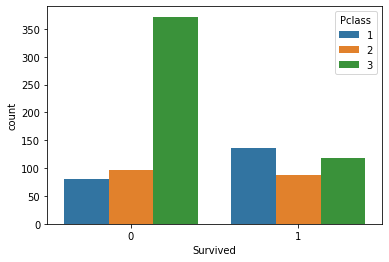

In [8]:
#Pclasssurvival rate
sns.countplot(x="Survived", hue="Pclass", data=df)

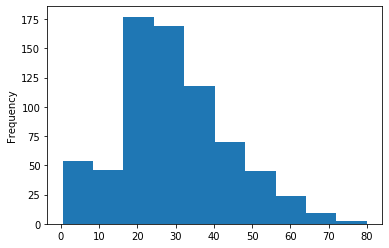

In [9]:
# age distribution
df["Age"].plot.hist()

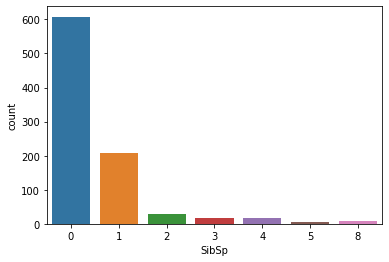

In [10]:
sns.countplot(x="SibSp", data=df)

# Data wrangling

In [12]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

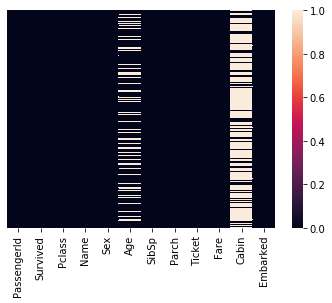

In [16]:
#visually rep the null values
sns.heatmap(df.isnull(), yticklabels=False)

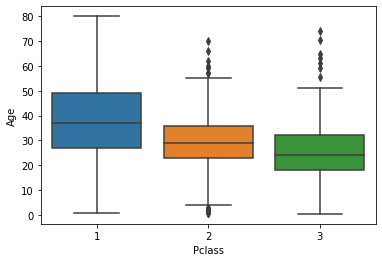

In [17]:
sns.boxplot(x="Pclass", y="Age", data= df)

In [18]:
#dropping a column
df.drop("Cabin", axis=1, inplace=True)

In [20]:
#dropping null values
df.dropna(inplace=True)

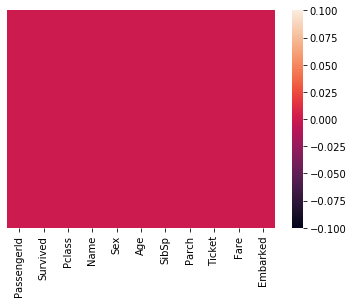

In [21]:
sns.heatmap(df.isnull(), yticklabels=False)

In [23]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [27]:
#converting str(sex) to categorical variable
sex=pd.get_dummies(df["Sex"], drop_first=True)
sex.head(5)

male
0     1
1     0
2     0
3     0
4     1

In [30]:
embar = pd.get_dummies(df["Embarked"], drop_first=True)
embar.head(5)

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [33]:
pc = pd.get_dummies(df["Pclass"], drop_first=True)
pc.head(5)

2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1

In [34]:
df = pd.concat([df,sex,embar,pc] ,axis =1)

In [41]:
df.head(5)

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0       3  22.0      1      0   7.2500     1  0  1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1  0  1
3         1       1  35.0      1      0  53.1000     0  0  1  0  0
4         0       3  35.0      0      0   8.0500     1  0  1  0  1

In [42]:
df.drop(["Pclass"], axis=1, inplace=True)

In [43]:
df.head()

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1

# Train sets

In [44]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [46]:
from sklearn.model_selection import train_test_split


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state= 1)

In [48]:
from sklearn.linear_model import LogisticRegression

In [50]:
logr = LogisticRegression()
logr.fit(x_train,y_train)

C:\Users\mhide\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred = logr.predict(x_test)


In [52]:
# accuracy
from sklearn.metrics import classification_report
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7850467289719626